In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install opencv-python
!pip install transformers  # For using the Deformable DETR model
!pip install moviepy
!pip install timm

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.8
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.9.30.0.32.59
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

In [3]:
# Import libraries
import cv2
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from google.colab.patches import cv2_imshow
from moviepy.editor import VideoFileClip

  if event.key is 'enter':



In [4]:
# Load the Deformable DETR model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
# After installing 'timm', restart the kernel before running this line
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [5]:
# Function to predict and detect objects in images and videos
def predict_and_detect(img, threshold=0.5):
    # Preprocess the image
    inputs = processor(images=img, return_tensors="pt")

    # Forward pass
    outputs = model(**inputs)

    # Post-process the outputs
    target_sizes = torch.tensor([img.shape[:-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=threshold)[0]

    # Draw bounding boxes on the image
    for score, label, box in zip(results['scores'], results['labels'], results['boxes']):
        if score > threshold:
            box = box.detach().numpy().astype(int)
            cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
            cv2.putText(img, f"{model.config.id2label[label.item()]}: {score:.2f}",
                        (box[0], box[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)

    return img

In [8]:
# Detecting Objects in Images with Deformable DETR
# Read the image
image_path = "/content/drive/MyDrive/cars.jpg"
image = cv2.imread(image_path)
result_img = predict_and_detect(image, threshold=0.5)

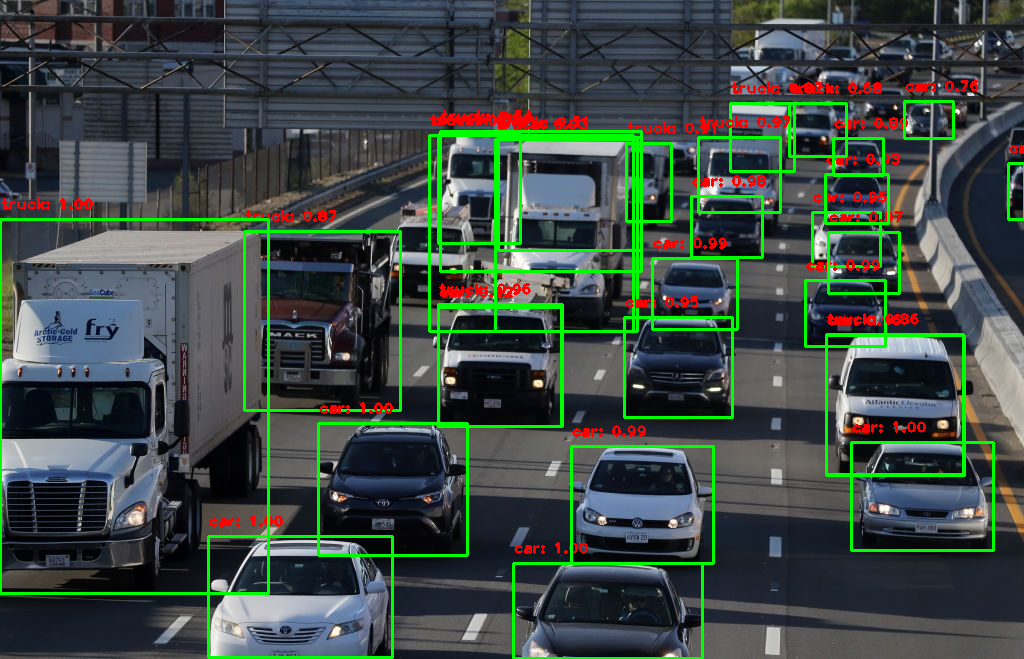

-1

In [9]:
# Necessary to display images in Google Colab when using OpenCV.
# Save and Plot the result Image
cv2_imshow(result_img)
cv2.imwrite("/content/drive/MyDrive/result_detr.jpg", result_img)  # Save the result image
cv2.waitKey(0)


In [11]:
# Detecting Objects in Videos with Deformable DETR
# Read a video file frame by frame, performs object detection on each frame, and displays the results
video_path = "/content/drive/MyDrive/Video2.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    success, img = cap.read()
    if not success:
        break
    result_img = predict_and_detect(img, threshold=0.5)
    cv2_imshow(result_img)
    cv2.waitKey(1)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Prepare to save processed frames to a new video file
output_path = "/content/drive/MyDrive/result_video_detr.mp4"
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Reset the video capture to the start
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

while True:
    success, img = cap.read()
    if not success:
        break
    result_img = predict_and_detect(img, threshold=0.5)
    writer.write(result_img)  # Write the frame to the output video

# Release the VideoCapture and VideoWriter objects
cap.release()
writer.release()

In [13]:
# Show the result video
clip = VideoFileClip(output_path)
clip.ipython_display(loop=True, autoplay=True)

Output hidden; open in https://colab.research.google.com to view.